# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

In [1]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=3.8
t=0.015
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-3.6, 3.8, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)


with open("cir_geo_threein.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_threein.csv",names=['Calculation'])
data.to_csv("cir_geo_threeinupdated.csv")

for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirthree_geo.pdf", bbox_inches='tight')
plt.show()

[0.09989042814968974, 0.1053105216545017, 0.11132262234305511, 0.1180229820829653, 0.12552795428674937, 0.1339786887757798, 0.14354670754900545, 0.1544401305941506, 0.16690970193344642, 0.18125235391936637, 0.19780696738899042, 0.21693055542627912, 0.23893054326978921, 0.26390741084475045, 0.291436981220473, 0.3200347442047593, 0.34652740723269426, 0.36597373145218787, 0.37322143962741405, 0.36597373145218737, 0.3465274072326936, 0.3200347442047584, 0.29143698122047207, 0.2639074108447496, 0.23893054326978846, 0.21693055542627845, 0.1978069673889899, 0.18125235391936584, 0.16690970193344598, 0.15444013059415024, 0.14354670754900511, 0.1339786887757795, 0.1255279542867491, 0.11802298208296509, 0.11132262234305493, 0.10531052165450153, 0.09989042814968957]
0.09989042814968974
0.1053105216545017
0.11132262234305511
0.1180229820829653
0.12552795428674937
0.1339786887757798
0.14354670754900545
0.1544401305941506
0.16690970193344642
0.18125235391936637
0.19780696738899042
0.21693055542627912

<Figure size 640x480 with 1 Axes>

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.30851606302488566
0.3042010606652987
0.30108373159997354
0.29903004785119464
0.2978867670649404
0.29749672584023473
0.2977084200687237
0.2983811529935989
0.2993873644555399
0.30061334811019813
0.3019591126440525
0.30333782599261794
0.30467508912077657
0.3059081757995983
0.30698531290079034
0.3078650419704028
0.3085156830415543
0.3089149119267166
0.309049456153322
0.3089149119267165
0.3085156830415543
0.3078650419704028
0.3069853129007907
0.3059081757995965
0.304675089120778
0.3033378259926182
0.3019591126440525
0.30061334811019774
0.29938736445554004
0.29838115299359896
0.2977084200687235
0.29749672584023473
0.2978867670649402
0.29903004785119447
0.3010837315999734
0.30420106066529856
0.3085160630248856


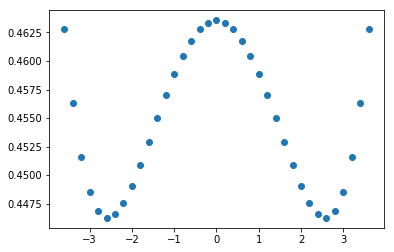

In [2]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=3.8
t=0.015
h=7.6
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-3.6, 3.8, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

In [3]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=3.8
t=0.015
h=7.6
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-3.6, 3.8, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


3099.992221698076
2938.5049290574434
2785.534378045861
2641.314560766094
2506.0635791741806
2379.9520965369875
2263.0975829648046
2155.5720327680815
2057.4136872270246
1968.638006254088
1889.246278931756
1819.231774073101
1758.5838736717042
1707.2907252007699
1665.3408755321152
1632.7242369851297
1609.4326328875109
1595.4600891773139
1590.8029795005507
1595.460089177315
1609.4326328875122
1632.724236985131
1665.3408755321184
1707.2907252007699
1758.583873671706
1819.2317740731078
1889.2462789317544
1968.63800625409
2057.413687227028
2155.572032768086
2263.0975829648037
2379.952096536993
2506.0635791741797
2641.3145607660936
2785.5343780458606
2938.5049290574434
3099.992221698076


-----------------------------
Thease are the products
1434.5960934690884
1340.8444742842237
1258.018627563089
1184.7486292439132
1119.7847664890849
1062.041934564534
1010.6148088286991
964.7731027471439
923.94549212048
887.6982934155399
855.7126949284667
827.7627169860419
803.6950476559305
783.4112869586112
766.8527846425538
753.9880736182813
744.8028120669862
739.292119396202
737.4551934925942
739.2921193962022
744.8028120669869
753.988073618282
766.8527846425561
783.4112869586065
803.695047655935
827.7627169860457
855.712694928466
887.6982934155395
923.945492120482
964.7731027471461
1010.614808828698
1062.0419345645364
1119.784766489084
1184.7486292439125
1258.018627563088
1340.8444742842235
1434.5960934690881
THIS IS COEFFICIENT1
[0.5626633966200001, 0.5764834800000002, 0.602176, 0.629336, 0.658145, 0.692677, 0.7275139, 0.753133895015248, 0.7708550345267149, 0.7843666765840637]
These are the elements of products: 
624.5872741941045
583.770162991494
547.70985997528
515.8099344570688


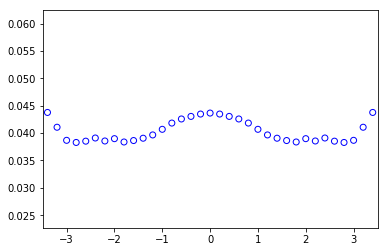

In [4]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   

First_extra_sublist=products[0:8]
First_sublist=products[8:18]
Second_sublist=products[19:29]
Second_extra_sublist=products[29:37]


Coefficient1=[0.5681*0.85*1.08*1.0789, 0.59309*0.9*1.08, 0.6208*0.97, 0.6488*0.97, 
              0.6785*0.97, 0.7141*0.97, 0.7606*0.9565, 0.8217*0.9565*0.95*1.0339*0.9756,
              0.8957*0.9565*0.95*0.9708*0.9756, 0.9669*0.9565*0.95*0.9708*0.9426*0.9756]
Coefficient1 = [x * 1 for x in Coefficient1]
First_extra_coefficient=[0.4*0.9375*0.9,0.4*0.9375*0.9,0.4*0.9375*0.9,0.4*0.9375*0.9,
                         0.4*0.9379*0.9422,0.4*0.9375,0.4,0.4*1.0329]
First_extra_coefficient=[x*1.29 for x in First_extra_coefficient]

def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)
Second_extra_coefficient=Reverse(First_extra_coefficient)

print("THIS IS COEFFICIENT1")
print(Coefficient1)

for num1, num2 in zip(First_extra_sublist, First_extra_coefficient):
    first_extra_list=(num1*num2)
    products1.append(first_extra_list)

for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*0.92*0.8797*0.9756 for i in products[18:19]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)

for num1, num2 in zip(Second_extra_sublist, Second_extra_coefficient):
    second_extra_list=(num1*num2)
    products1.append(second_extra_list)



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/37
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/37)
er=Sigma/(math.sqrt(37)) 



intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(0.15*(i/2000))
   
    
with open("cir_intr_threein.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_threein.csv",names=['Calculation'])
data.to_csv("cir_intr_threeinupdated.csv")
    
    
print("This is the size of your y: ")
print(len(y_positions))
print("--------------------------------------------------------")
print("This is the size of your efficiency: ")
print(len(intrinsic_eff))
print("***********************************************************************************")
print("These are the values of intrinsic detection efficiency: ")
print(intrinsic_eff)
print("***********************************************************************************")
    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
plt.xlim(-3.5,3.5)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirthree_intr.pdf", bbox_inches='tight')
plt.show()



0.004679271767707256
0.004610785529322578
0.004572937342169676
0.00456580699894816
0.004807127123320435
0.005162494829203826
0.005614225579375176
0.005955998637739514
0.00650785487254395
0.006956602207688341
0.007644591191591173
0.008475599538573136
0.009478635273475904
0.01074072113464164
0.012194365768863765
0.013629975114908035
0.014921513404091518
0.015916456581808184
0.016298877533479722
0.01591645658180817
0.014921513404091504
0.013629975114908011
0.012194365768863765
0.010740721134641544
0.009478635273475929
0.008475599538573148
0.007644591191591147
0.006956602207688319
0.006507854872543946
0.005955998637739513
0.005614225579375158
0.005162494829203827
0.00480712712332042
0.0045658069989481485
0.004572937342169665
0.00461078552932257
0.004679271767707248


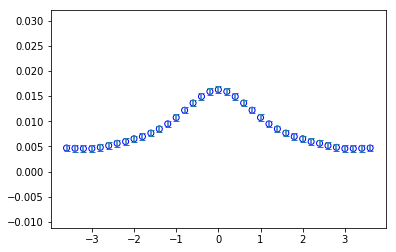

In [5]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=3.8
t=0.015
h=7.6
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-3.6, 3.8, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-3.6, 3.8, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/37
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/37)
er=Sigma/(math.sqrt(37)) 

with open("cir_total_threein.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_threein.csv",names=['Calculation'])
data.to_csv("cir_total_threeinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
#plt.ylim(0.01,0.045)
plt.savefig("cirthree_total.pdf", bbox_inches='tight')
plt.show()